# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [7]:
# Your code here. 
student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30], 'Y': [10,1,5,9,4,2,9,6,0,3]})
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

Text(22.049999999999997, 0.5, 'TARDIES')

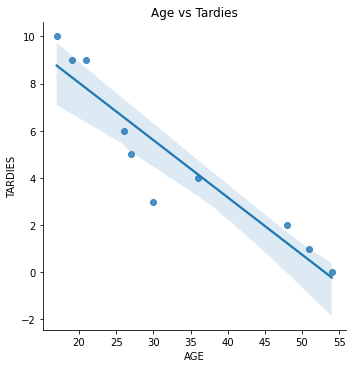

In [11]:
# Your code here.

sns.lmplot(x ='X', y ='Y', data = student_data)
plt.title('Age vs Tardies')
# Set x-axis label
plt.xlabel('AGE')
# Set y-axis label
plt.ylabel('TARDIES')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# As peoples ages go up, their tardies go down.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [19]:
print('Covariance matrix'),np.cov(student_data['X'],student_data['Y'])

Covariance matrix


(None,
 array([[187.65555556, -45.56666667],
        [-45.56666667,  12.54444444]]))

In [60]:
#np.correlate(student_data['X'],student_data['Y'])
#pearsonr(student_data['X'],student_data['Y'])

In [23]:
print(student_data.corr())

          X         Y
X  1.000000 -0.939163
Y -0.939163  1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [65]:
# Your response here.

xpoints = np.array([17,51,27,21,36,48,19,26,54,30]).reshape(-1,1)
ypoints = np.array([10,1,5,9,4,2,9,6,0,3])

reg = LinearRegression().fit(xpoints, ypoints)
reg.score(xpoints,ypoints)


0.8820265558250109

In [67]:
#Ordinary Least Squares is the method

In [66]:
print(xpoints)

[[17]
 [51]
 [27]
 [21]
 [36]
 [48]
 [19]
 [26]
 [54]
 [30]]


Plot your regression model on your scatter plot.

In [33]:
linreg = LinearRegression()
linreg.fit(xpoints, ypoints)

LinearRegression()

In [34]:
y_pred = linreg.predict(xpoints)

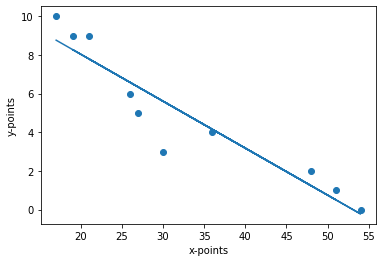

In [35]:
plt.scatter(xpoints, ypoints)
plt.plot(xpoints, y_pred)
plt.xlabel('x-points')
plt.ylabel('y-points')
plt.show()

In [36]:
print(linreg.coef_)
print(linreg.intercept_)

[-0.24282077]
12.888803363135768


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# We can see that as the ages go up people are less tardy
#they are more responsible
#with our score of 0.8820265558250109 we can see that there is not
#much variance

In [73]:
#x_new = np.array([10]).reshape(-1,1)
#y_new = linreg.predict(x_new)
#print(y_new)

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [40]:
# Import any libraries you may need & the data

data = pd.read_csv('vehicles.csv')
data.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [74]:
print(data.corr())

                             Year  Engine Displacement  Cylinders  \
Year                     1.000000             0.037876   0.082469   
Engine Displacement      0.037876             1.000000   0.901858   
Cylinders                0.082469             0.901858   1.000000   
Fuel Barrels/Year       -0.221084             0.789752   0.739517   
City MPG                 0.161818            -0.740317  -0.703866   
Highway MPG              0.267259            -0.715039  -0.650287   
Combined MPG             0.204751            -0.746782  -0.698648   
CO2 Emission Grams/Mile -0.222300             0.803520   0.752393   
Fuel Cost/Year          -0.091913             0.769678   0.778153   

                         Fuel Barrels/Year  City MPG  Highway MPG  \
Year                             -0.221084  0.161818     0.267259   
Engine Displacement               0.789752 -0.740317    -0.715039   
Cylinders                         0.739517 -0.703866    -0.650287   
Fuel Barrels/Year                

In [43]:
pearsonr(data['Year'],data['CO2 Emission Grams/Mile'])

(-0.2222996029505423, 0.0)

In [44]:
pearsonr(data['Cylinders'],data['CO2 Emission Grams/Mile'])

(0.7523925537297488, 0.0)

In [45]:
pearsonr(data['Fuel Barrels/Year'],data['CO2 Emission Grams/Mile'])

(0.986188662142873, 0.0)

In [47]:
pearsonr(data['Combined MPG'],data['CO2 Emission Grams/Mile'])

(-0.9262290389336452, 0.0)

In [48]:
pearsonr(data['Fuel Cost/Year'],data['CO2 Emission Grams/Mile'])

(0.930865151220184, 0.0)

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [55]:
# Your response here. 


xpoints2 = np.array(data['Fuel Barrels/Year']).reshape(-1,1)
ypoints2 = np.array(data['CO2 Emission Grams/Mile'])

reg = LinearRegression().fit(xpoints, ypoints)
reg.score(xpoints,ypoints)


0.9725680773391494

In [56]:
linreg = LinearRegression()
linreg.fit(xpoints, ypoints)

LinearRegression()

In [57]:
y_pred = linreg.predict(xpoints)

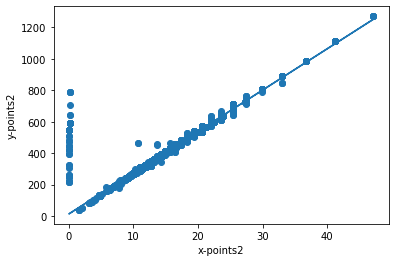

In [58]:
plt.scatter(xpoints2, ypoints2)
plt.plot(xpoints2, y_pred)
plt.xlabel('x-points2')
plt.ylabel('y-points2')
plt.show()

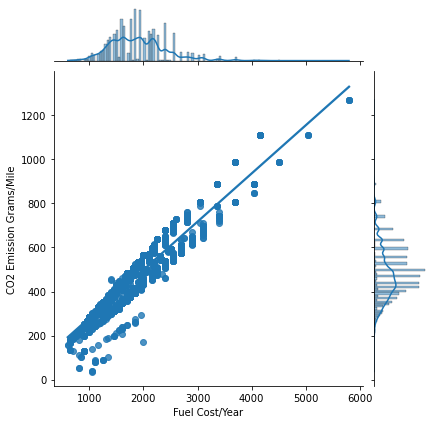

In [92]:
sns.jointplot(x='Fuel Cost/Year', y='CO2 Emission Grams/Mile', data=data, kind='reg')

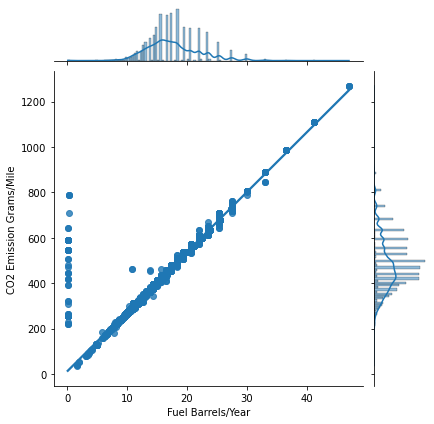

In [93]:
sns.jointplot(x='Fuel Barrels/Year', y='CO2 Emission Grams/Mile', data=data, kind='reg')

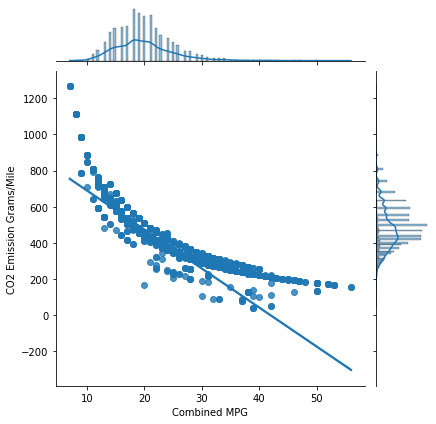

In [94]:
sns.jointplot(x='Combined MPG', y='CO2 Emission Grams/Mile', data=data, kind='reg')

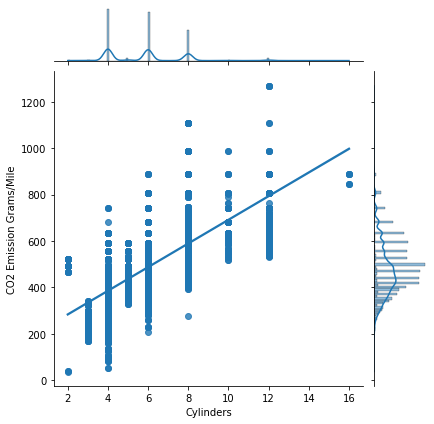

In [95]:
sns.jointplot(x='Cylinders', y='CO2 Emission Grams/Mile', data=data, kind='reg')

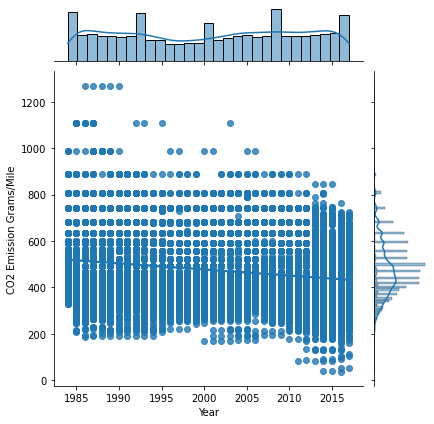

In [96]:
sns.jointplot(x='Year', y='CO2 Emission Grams/Mile', data=data, kind='reg')

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [78]:
import statsmodels.api as sm

In [82]:
vehicles = data[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]

In [85]:
sm.add_constant(vehicles.loc[:, vehicles.columns != 'CO2 Emission Grams/Mile']).head(40)

,const,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
0,1.0,1984,4.0,19.388824,17,1950
1,1.0,1984,6.0,25.354615,13,2550
2,1.0,1985,4.0,20.600625,16,2100
3,1.0,1985,6.0,25.354615,13,2550
4,1.0,1987,6.0,20.600625,16,2550
5,1.0,1997,4.0,14.982273,22,1500
6,1.0,1997,4.0,13.733750,24,1400
7,1.0,1997,6.0,16.480500,20,1650
8,1.0,1998,4.0,14.982273,22,1500
9,1.0,1998,4.0,13.733750,24,1400


In [88]:
# Asignamos variables independientes (X) y la dependiente (Y)
X = sm.add_constant(vehicles.loc[:, vehicles.columns != 'CO2 Emission Grams/Mile'])
Y = vehicles['CO2 Emission Grams/Mile']

# Creamos el modelo (OLS, que significa "ordinary least square", es lo mismo que una regresión lineal)
modelo = sm.OLS(Y, X)
modelo = modelo.fit()

# Una vez entrenado el modelo, predecimos los valores de y para nuestros valores x originales. 
predicciones = modelo.predict(X)

In [89]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                             15:39:33   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""